En este tercer avance del proyecto correspondiente a las tareas "Estadísticas descriptivas, generar visualizaciones, identificar patrones y formular hipótesis" suba como evidencia un informe del análisis exploratorio de datos realizado (formato PDF)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./fuentes/MatriculaPorEntidad.csv")

display(df[df['entidad_federativa'] == 'Estados Unidos Mexicanos'])


,entidad_federativa,nivel_educativo,2015-2016_total,2015-2016_hombres,2015-2016_mujeres,2020-2021_total,2020-2021_hombres,2020-2021_mujeres,2021-2022_total,2021-2022_hombres,2021-2022_mujeres,2022-2023_total,2022-2023_hombres,2022-2023_mujeres,2023-2024_total,2023-2024_hombres,2023-2024_mujeres
60,Estados Unidos Mexicanos,Preescolar,4811966,2430962,2381004,4328188,2182537,2145651,4153558,2090597,2062961,4334938,2179034,2155904,4243279,2133580,2109699
61,Estados Unidos Mexicanos,Primaria,14250425,7265887,6984538,13677465,6955332,6722133,13464469,6843193,6621276,13345969,6779902,6566067,13154354,6680355,6473999
62,Estados Unidos Mexicanos,Secundaria,6835245,3454409,3380836,6394720,3220968,3173752,6305013,3169182,3135831,6210924,3119827,3091097,6284377,3166930,3117447
63,Estados Unidos Mexicanos,Media superior,4985080,2484525,2500555,4985005,2422022,2562983,4861091,2328329,2532762,5003087,2420910,2582177,5103342,2470633,2632709
64,Estados Unidos Mexicanos,Superior,3648945,1848387,1800558,4030616,1945397,2085219,4004680,1888837,2115843,4032931,1901523,2131408,4051691,1903882,2147809
65,Estados Unidos Mexicanos,Total,34531661,17484170,17047491,33415994,16726256,16689738,32788811,16320138,16468673,32927849,16401196,16526653,32837043,16355380,16481663


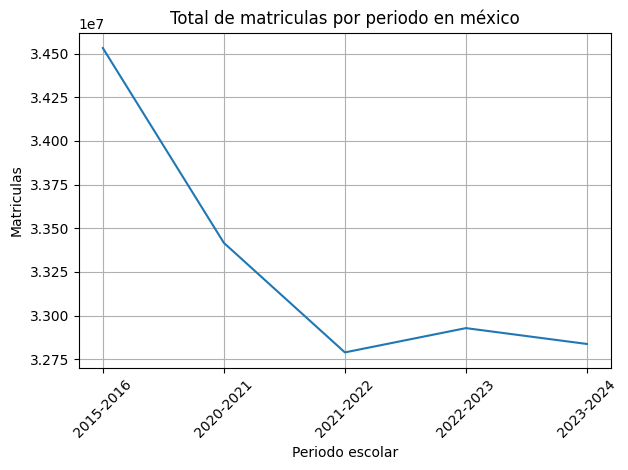

In [3]:
dfTotales = df[['entidad_federativa', 'nivel_educativo', '2015-2016_total', '2020-2021_total', '2021-2022_total', '2022-2023_total', '2023-2024_total']]

dfTotales = dfTotales[dfTotales["nivel_educativo"] == "Total"]
dfTotales = dfTotales[dfTotales['entidad_federativa'] == 'Estados Unidos Mexicanos']

periodos = ['2015-2016', '2020-2021', '2021-2022', '2022-2023', '2023-2024']
fila_uno = dfTotales.iloc[0].tolist()

fila_uno.pop(0)
fila_uno.pop(0)


plt.plot(periodos, fila_uno)
plt.title('Total de matriculas por periodo en méxico')
plt.xlabel('Periodo escolar')
plt.ylabel('Matriculas')
plt.xticks(rotation=45) # rotar las etiquetas del eje x
plt.tight_layout()
plt.grid(True)

plt.show()

Es evidente cómo hubo una baja significativa de matriculas totales en el país del periodo 2015-2016 al periodo 2020-2021. En nuestra interpretación es posible que esto se deba a la pandemia.

[4811966, 4328188, 4153558, 4334938, 4243279]
[14250425, 13677465, 13464469, 13345969, 13154354]
[6835245, 6394720, 6305013, 6210924, 6284377]
[4985080, 4985005, 4861091, 5003087, 5103342]
[3648945, 4030616, 4004680, 4032931, 4051691]


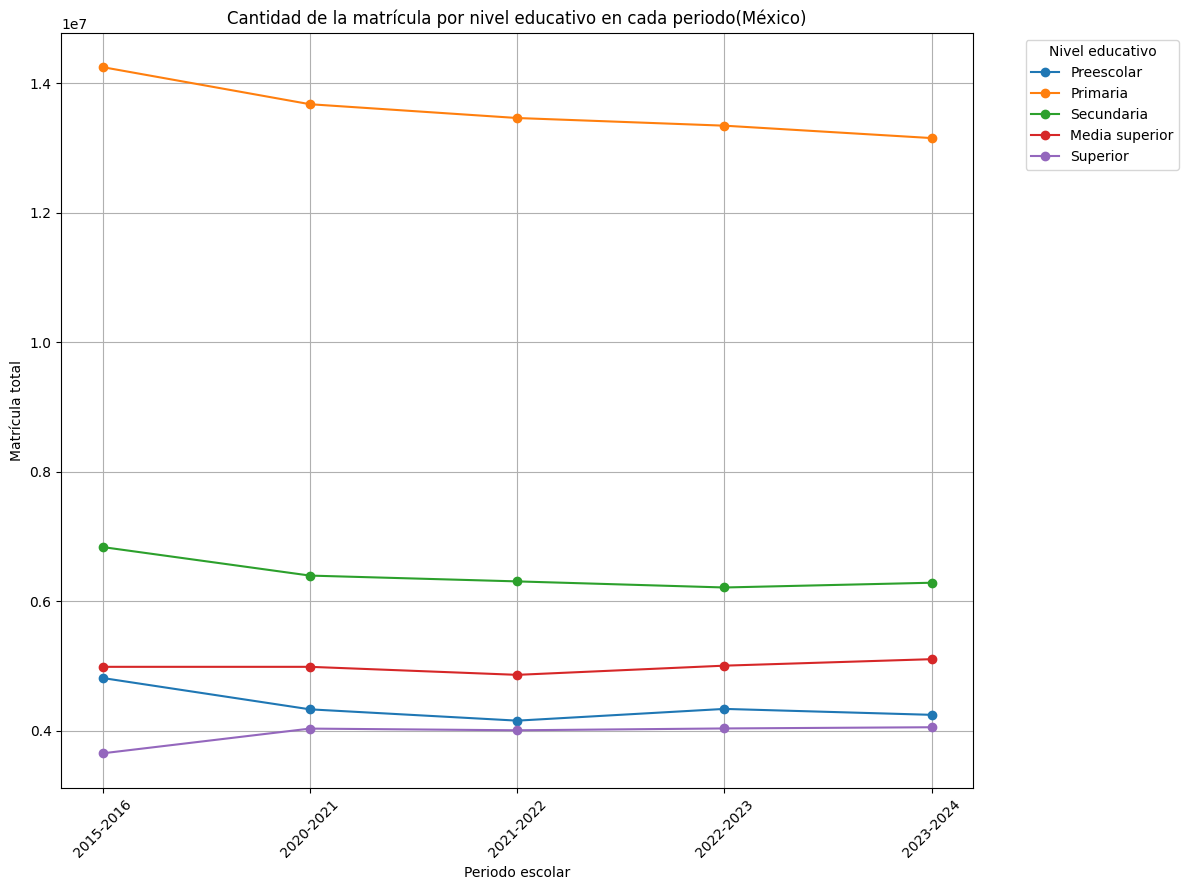

In [4]:
# Filtrar los registros a nivel nacional, excepto el total general
# niveles = df[df["entidad_federativa"] == "Estados Unidos Mexicanos"]
# niveles = niveles[niveles["nivel_educativo"] != "Inicial"]
# niveles = niveles[niveles["nivel_educativo"] != "Total"]
niveles = df[
    (df["entidad_federativa"] == "Estados Unidos Mexicanos") &
    (~df["nivel_educativo"].isin(["Total", "Inicial"]))
]

# Definir los periodos escolares y columnas de interés
periodos = ['2015-2016', '2020-2021', '2021-2022', '2022-2023', '2023-2024']
columnas_totales = [f"{anio}_total" for anio in periodos]

# Crear la gráfica
plt.figure(figsize=(12, 9))
for _, fila in niveles.iterrows():
	nombre_nivel = fila["nivel_educativo"]
	# Convertir los valores a enteros y manejar valores -1 como 0
	valores = [int(fila[col]) if fila[col] != -1 else 0 for col in columnas_totales]
	print(valores)
	plt.plot(periodos, valores, marker='o', label=nombre_nivel)
    

# Personalizar la gráfica
plt.title('Cantidad de la matrícula por nivel educativo en cada periodo(México)')
plt.xlabel('Periodo escolar')
plt.ylabel('Matrícula total')
plt.xticks(rotation=45)
plt.legend(title='Nivel educativo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


Con esta grafica se puede observar que, la disminución o aumento no es tan sencilla cómo que hubo menos alumnos, en las primarias si es visible la disminución del 2015 al 2020, pero en nivel superior hubo un aumento, o en Media superior, pareciera que se ha mantenido bastante estable.

,nivel_educativo,Variación 2015-2020 (%),Variación 2020-2021 (%)
0,Preescolar,-10.053645,-4.034714
1,Primaria,-4.020652,-1.557277
2,Secundaria,-6.444904,-1.402829
3,Media superior,-0.001504,-2.485735
4,Superior,10.459763,-0.643475


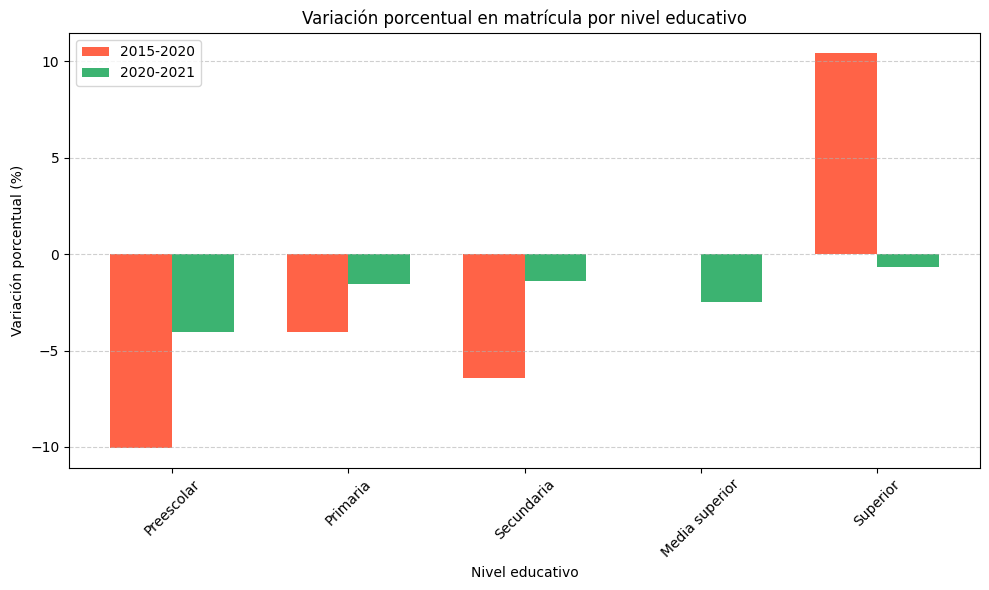

In [5]:

# Filtrar solo registros nacionales y eliminar "Total" e "Inicial"
niveles_var = df[
    (df["entidad_federativa"] == "Estados Unidos Mexicanos") &
    (~df["nivel_educativo"].isin(["Total", "Inicial"]))
]

# Calcular variaciones porcentuales
variaciones = []
for _, fila in niveles_var.iterrows():
    nivel = fila["nivel_educativo"]
    val_2015 = fila["2015-2016_total"]
    val_2020 = fila["2020-2021_total"]
    val_2021 = fila["2021-2022_total"]
   #  val_2023 = fila["2023-2024_total"]
    
    if val_2015 > 0:
        cambio_2020 = ((val_2020 - val_2015) / val_2015) * 100
        cambio_2021 = ((val_2021 - val_2020) / val_2020) * 100
    else:
        cambio_2020 = cambio_2021 = 0
    
    variaciones.append({
        "nivel_educativo": nivel,
        "Variación 2015-2020 (%)": cambio_2020,
        "Variación 2020-2021 (%)": cambio_2021
    })

# Crear DataFrame de variaciones
df_variaciones = pd.DataFrame(variaciones)
display(df_variaciones)

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_variaciones))

plt.bar(x, df_variaciones["Variación 2015-2020 (%)"], width=bar_width, label='2015-2020', color='tomato')
plt.bar([i + bar_width for i in x], df_variaciones["Variación 2020-2021 (%)"], width=bar_width, label='2020-2021', color='mediumseagreen')


plt.xlabel("Nivel educativo")
plt.ylabel("Variación porcentual (%)")
plt.title("Variación porcentual en matrícula por nivel educativo")
plt.xticks([i + bar_width / 2 for i in x], df_variaciones["nivel_educativo"], rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Cómo se pudo apreciar en la gráfica anterior, ahora de un modo más claro se puede notar que, en preescoalr fue donde más hubo una disminución de los matriculados, llegando a ser un 10% menos en 2020 que en 2015, y esta disminución continuo al siguiente año, ya que hubo casi un 5% menos en el 2021 que en el 2020.<br>
En contraparte, en Superior hubo un gran cambio del 2015 al 2020 pero positivo, creció un poco más del 10% la cantidad de alumnos matriculados en nivel superior en esos 5 años previos a pandemia, pero justo del 2020 al 2021 si hubo disminución, se mantuvo muy similar ya que la disminución fue de menos del 5%, pero es mucha diferencia en comparación al crecimiento que habia estado teniendo.

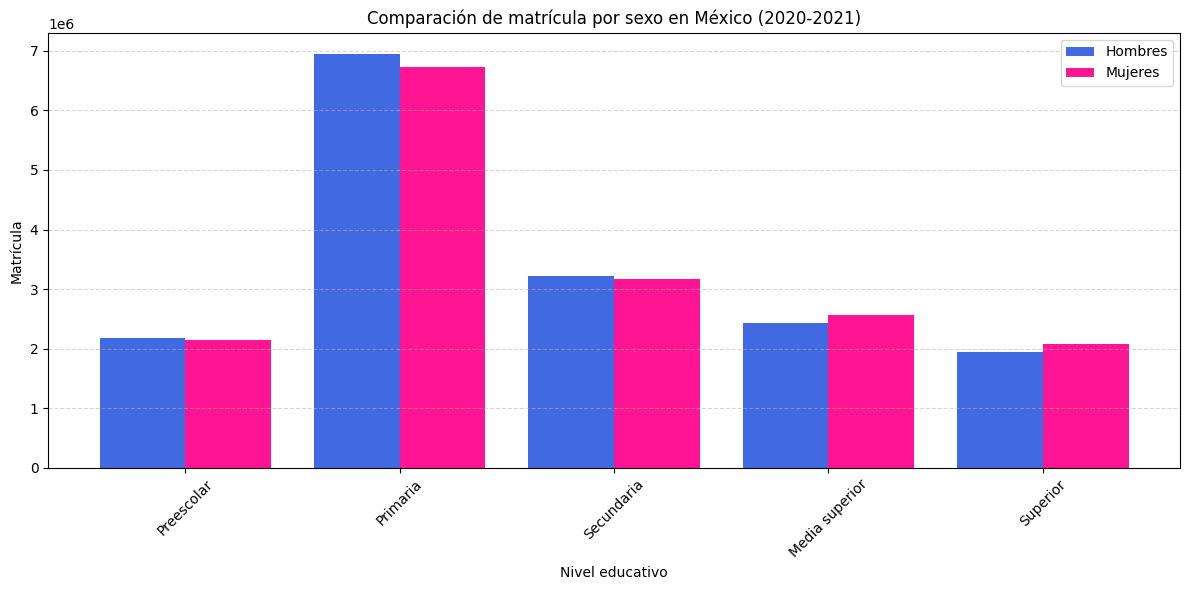

In [6]:
# Filtrar solo datos nacionales y quitar 'Total' e 'Inicial'
df_sexo = df[
    (df["entidad_federativa"] == "Estados Unidos Mexicanos") &
    (~df["nivel_educativo"].isin(["Total", "Inicial"]))
]

# Obtener datos necesarios
niveles = df_sexo["nivel_educativo"]
hombres = df_sexo["2020-2021_hombres"]
mujeres = df_sexo["2020-2021_mujeres"]

# Crear gráfica de barras
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(niveles))

plt.bar(x, hombres, width=bar_width, label='Hombres', color='royalblue')
plt.bar([i + bar_width for i in x], mujeres, width=bar_width, label='Mujeres', color='deeppink')

plt.xlabel("Nivel educativo")
plt.ylabel("Matrícula")
plt.title("Comparación de matrícula por sexo en México (2020-2021)")
plt.xticks([i + bar_width / 2 for i in x], niveles, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


,entidad_federativa,nivel_educativo,2015-2016_total,2015-2016_hombres,2015-2016_mujeres,2020-2021_total,2020-2021_hombres,2020-2021_mujeres,2021-2022_total,2021-2022_hombres,2021-2022_mujeres,2022-2023_total,2022-2023_hombres,2022-2023_mujeres,2023-2024_total,2023-2024_hombres,2023-2024_mujeres
65,Estados Unidos Mexicanos,Total,34531661,17484170,17047491,33415994,16726256,16689738,32788811,16320138,16468673,32927849,16401196,16526653,32837043,16355380,16481663


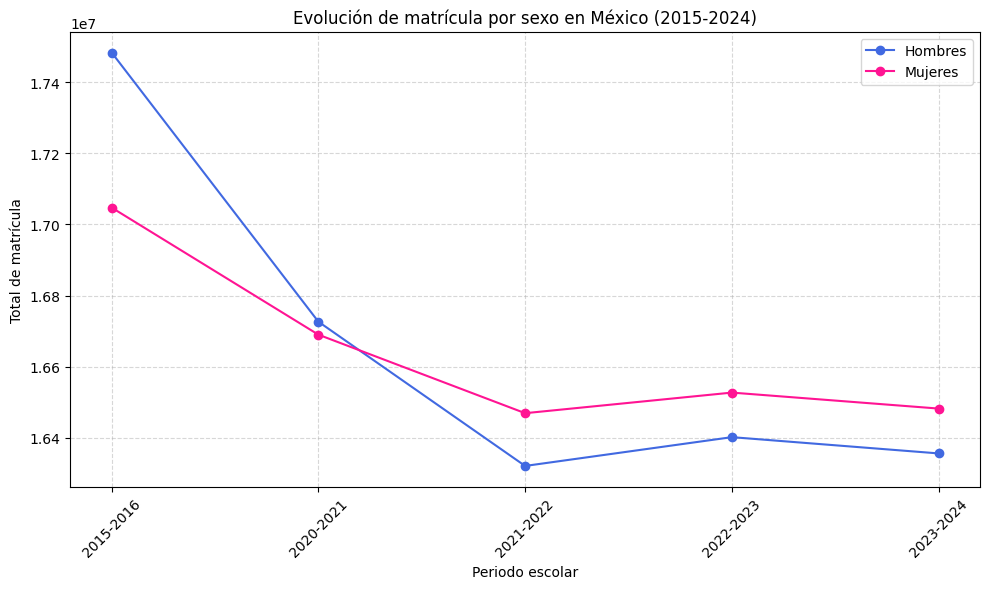

In [7]:

# Filtrar solo datos nacionales y excluir 'Total' e 'Inicial'

# Matrícula total por sexo en cada ciclo escolar
totales = df[df['entidad_federativa'] == 'Estados Unidos Mexicanos']
totales = totales[totales['nivel_educativo'] == 'Total']

display(totales)
hombres_totales = [
	totales["2015-2016_hombres"].iloc[0],
	totales["2020-2021_hombres"].iloc[0],
	totales["2021-2022_hombres"].iloc[0],
	totales["2022-2023_hombres"].iloc[0],
	totales["2023-2024_hombres"].iloc[0]
]

mujeres_totales = [
	totales["2015-2016_mujeres"].iloc[0],
	totales["2020-2021_mujeres"].iloc[0],
	totales["2021-2022_mujeres"].iloc[0],
	totales["2022-2023_mujeres"].iloc[0],
	totales["2023-2024_mujeres"].iloc[0]
]

periodos = ["2015-2016", "2020-2021", "2021-2022", "2022-2023", "2023-2024"]

# Crear gráfica
plt.figure(figsize=(10, 6))
plt.plot(periodos, hombres_totales, marker='o', label='Hombres', color='royalblue')
plt.plot(periodos, mujeres_totales, marker='o', label='Mujeres', color='deeppink')

plt.title("Evolución de matrícula por sexo en México (2015-2024)")
plt.xlabel("Periodo escolar")
plt.ylabel("Total de matrícula")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
df_mexico = df[df["entidad_federativa"] == "Estados Unidos Mexicanos"]
display(df_mexico)


,entidad_federativa,nivel_educativo,2015-2016_total,2015-2016_hombres,2015-2016_mujeres,2020-2021_total,2020-2021_hombres,2020-2021_mujeres,2021-2022_total,2021-2022_hombres,2021-2022_mujeres,2022-2023_total,2022-2023_hombres,2022-2023_mujeres,2023-2024_total,2023-2024_hombres,2023-2024_mujeres
60,Estados Unidos Mexicanos,Preescolar,4811966,2430962,2381004,4328188,2182537,2145651,4153558,2090597,2062961,4334938,2179034,2155904,4243279,2133580,2109699
61,Estados Unidos Mexicanos,Primaria,14250425,7265887,6984538,13677465,6955332,6722133,13464469,6843193,6621276,13345969,6779902,6566067,13154354,6680355,6473999
62,Estados Unidos Mexicanos,Secundaria,6835245,3454409,3380836,6394720,3220968,3173752,6305013,3169182,3135831,6210924,3119827,3091097,6284377,3166930,3117447
63,Estados Unidos Mexicanos,Media superior,4985080,2484525,2500555,4985005,2422022,2562983,4861091,2328329,2532762,5003087,2420910,2582177,5103342,2470633,2632709
64,Estados Unidos Mexicanos,Superior,3648945,1848387,1800558,4030616,1945397,2085219,4004680,1888837,2115843,4032931,1901523,2131408,4051691,1903882,2147809
65,Estados Unidos Mexicanos,Total,34531661,17484170,17047491,33415994,16726256,16689738,32788811,16320138,16468673,32927849,16401196,16526653,32837043,16355380,16481663


## Nuevo archivo para hacer enfoque unicamente en universidades

In [9]:
dfUniv = pd.read_excel("./fuentes/ReporteSIIES.xlsx")

dfUniv = dfUniv.drop(columns=["#"])

display(dfUniv)



,Año,Entidad Federativa,Subsistema,Matrícula Total
0,2015,Aguascalientes,Universidad Estatal,15402
1,2015,Aguascalientes,Universidad Privada,12989
2,2016,Aguascalientes,Universidad Estatal,16403
3,2016,Aguascalientes,Universidad Privada,14719
4,2017,Aguascalientes,Universidad Estatal,16758
...,...,...,...,...
760,2022,Zacatecas,Universidad Federal,14
761,2022,Zacatecas,Universidad Privada,8060
762,2023,Zacatecas,Universidad Estatal,28221
763,2023,Zacatecas,Universidad Federal,0


In [10]:

# Calcular el total por estado y año
totales_por_estado = dfUniv.groupby(["Año", "Entidad Federativa"])["Matrícula Total"].sum().reset_index()

# Calcular el total nacional por año
totales_nacionales = totales_por_estado.groupby("Año")["Matrícula Total"].sum().reset_index()
totales_nacionales["Entidad Federativa"] = "Estados Unidos Mexicanos"

# Combinar los totales por estado y los totales nacionales
dfTotales = pd.concat([totales_por_estado, totales_nacionales], ignore_index=True)

display(dfTotales)




,Año,Entidad Federativa,Matrícula Total
0,2015,Aguascalientes,28391
1,2015,Baja California,90735
2,2015,Baja California Sur,11213
3,2015,Campeche,18724
4,2015,Chiapas,92232
...,...,...,...
292,2019,Estados Unidos Mexicanos,3041819
293,2020,Estados Unidos Mexicanos,3072121
294,2021,Estados Unidos Mexicanos,3131209
295,2022,Estados Unidos Mexicanos,3185229


In [11]:
# Filtrar universidades estatales
dfUniv_federal = dfUniv[dfUniv['Subsistema'].str.contains('Universidad Federal', case=False)]
dfUniv_federal = dfUniv_federal.drop(columns=["Subsistema"])

# Filtrar universidades federales
dfUniv_estatal = dfUniv[dfUniv['Subsistema'].str.contains('Universidad Estatal', case=False)]
dfUniv_estatal = dfUniv_estatal.drop(columns=["Subsistema"])

# Filtrar universidades privadas
dfUniv_privadas = dfUniv[dfUniv['Subsistema'].str.contains('Universidad Privada', case=False)]
dfUniv_privadas = dfUniv_privadas.drop(columns=["Subsistema"])


# Mostrar los DataFrames resultantes
display(dfUniv_estatal)
display(dfUniv_federal)
display(dfUniv_privadas)



,Año,Entidad Federativa,Matrícula Total
0,2015,Aguascalientes,15402
2,2016,Aguascalientes,16403
4,2017,Aguascalientes,16758
6,2018,Aguascalientes,16728
8,2019,Aguascalientes,16623
...,...,...,...
750,2019,Zacatecas,27381
753,2020,Zacatecas,28071
756,2021,Zacatecas,27840
759,2022,Zacatecas,28263


,Año,Entidad Federativa,Matrícula Total
19,2015,Baja California,694
22,2016,Baja California,663
25,2017,Baja California,673
28,2018,Baja California,830
31,2019,Baja California,818
...,...,...,...
751,2019,Zacatecas,0
754,2020,Zacatecas,14
757,2021,Zacatecas,31
760,2022,Zacatecas,14


,Año,Entidad Federativa,Matrícula Total
1,2015,Aguascalientes,12989
3,2016,Aguascalientes,14719
5,2017,Aguascalientes,16192
7,2018,Aguascalientes,16938
9,2019,Aguascalientes,17095
...,...,...,...
752,2019,Zacatecas,7978
755,2020,Zacatecas,7715
758,2021,Zacatecas,6952
761,2022,Zacatecas,8060


In [12]:
# Crear nueva fila para el total de matriculados de cada subsistema
dfs = [dfUniv_federal, dfUniv_estatal, dfUniv_privadas]
for i in range(len(dfs)):
	totales_por_año = dfs[i].groupby("Año")["Matrícula Total"].sum().reset_index()
	totales_por_año["Entidad Federativa"] = "Estados Unidos Mexicanos"

	# display(totales_por_año)

	dfs[i] = pd.concat([dfs[i], totales_por_año], ignore_index=True)
	# display(dfs[i])
	dfs[i] = dfs[i].sort_values(by=["Año", "Entidad Federativa"]).reset_index(drop=True)

dfTotales = dfTotales.sort_values(by=["Año", "Entidad Federativa"]).reset_index(drop=True)

# Asignar los DataFrames filtrados a variables separadas
dfUniv_federal, dfUniv_estatal, dfUniv_privadas = dfs

# Mostrar los DataFrames resultantes
display(dfUniv_estatal)
display(dfUniv_federal)
display(dfUniv_privadas)
display(dfTotales)


,Año,Entidad Federativa,Matrícula Total
0,2015,Aguascalientes,15402
1,2015,Baja California,63632
2,2015,Baja California Sur,6101
3,2015,Campeche,12273
4,2015,Chiapas,34576
...,...,...,...
292,2023,Tamaulipas,36369
293,2023,Tlaxcala,14571
294,2023,Veracruz,94182
295,2023,Yucatán,20237


,Año,Entidad Federativa,Matrícula Total
0,2015,Baja California,694
1,2015,Baja California Sur,177
2,2015,Campeche,37
3,2015,Chiapas,175
4,2015,Chihuahua,455
...,...,...,...
193,2023,Sonora,256
194,2023,Tabasco,77
195,2023,Veracruz,145
196,2023,Yucatán,740


,Año,Entidad Federativa,Matrícula Total
0,2015,Aguascalientes,12989
1,2015,Baja California,26409
2,2015,Baja California Sur,4935
3,2015,Campeche,6414
4,2015,Chiapas,57481
...,...,...,...
292,2023,Tamaulipas,39041
293,2023,Tlaxcala,4158
294,2023,Veracruz,51552
295,2023,Yucatán,34638


,Año,Entidad Federativa,Matrícula Total
0,2015,Aguascalientes,28391
1,2015,Baja California,90735
2,2015,Baja California Sur,11213
3,2015,Campeche,18724
4,2015,Chiapas,92232
...,...,...,...
292,2023,Tamaulipas,75410
293,2023,Tlaxcala,18729
294,2023,Veracruz,145879
295,2023,Yucatán,55615


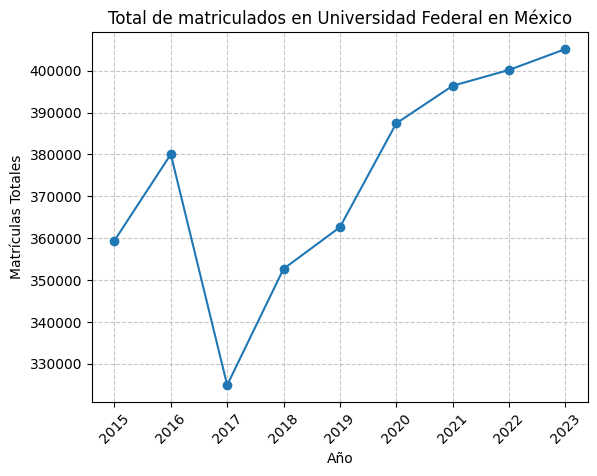

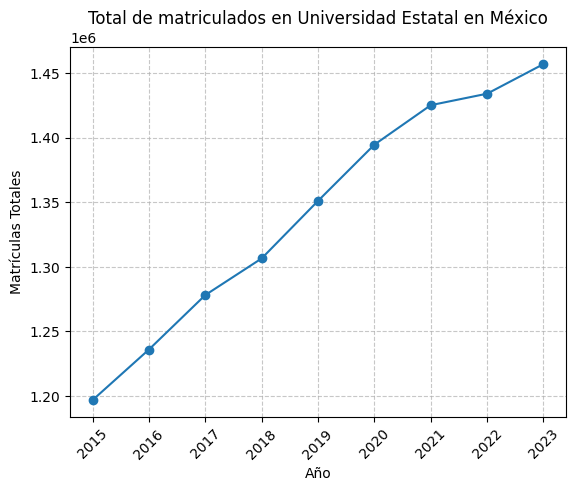

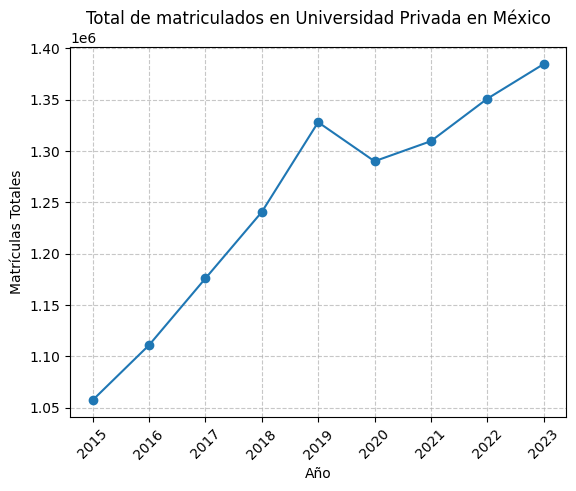

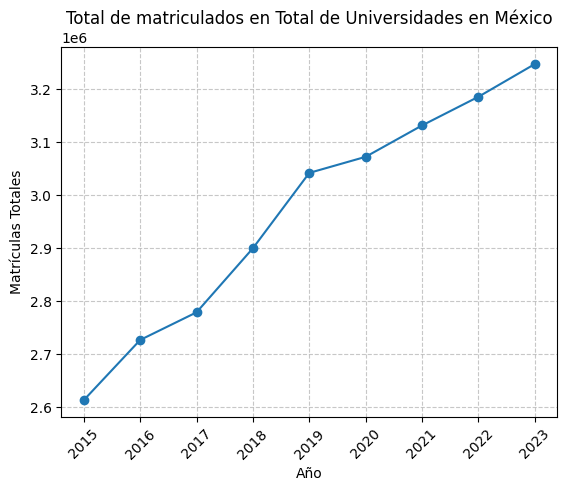

In [13]:
# Crear grafico de lineas para cada subsistema en el total de matriculados del pais
dfs = [dfUniv_federal, dfUniv_estatal, dfUniv_privadas, dfTotales]
subsistemas = ["Universidad Federal", "Universidad Estatal", "Universidad Privada", "Total de Universidades"]

for i in range(len(dfs)):   
	dates = dfs[i]["Año"].unique()
	data = dfs[i][dfs[i]["Entidad Federativa"] == "Estados Unidos Mexicanos"]["Matrícula Total"].tolist()

	plt.plot(dates, data, marker='o', linestyle='-', label=subsistemas[i])  # Agregar puntos con 'o'
	plt.title(f"Total de matriculados en {subsistemas[i]} en México")
	plt.xlabel("Año")
	plt.ylabel("Matrículas Totales")
	plt.xticks(rotation=45)
	plt.grid(True, linestyle='--', alpha=0.7)  # Activar cuadrícula con líneas punteadas


	plt.show()



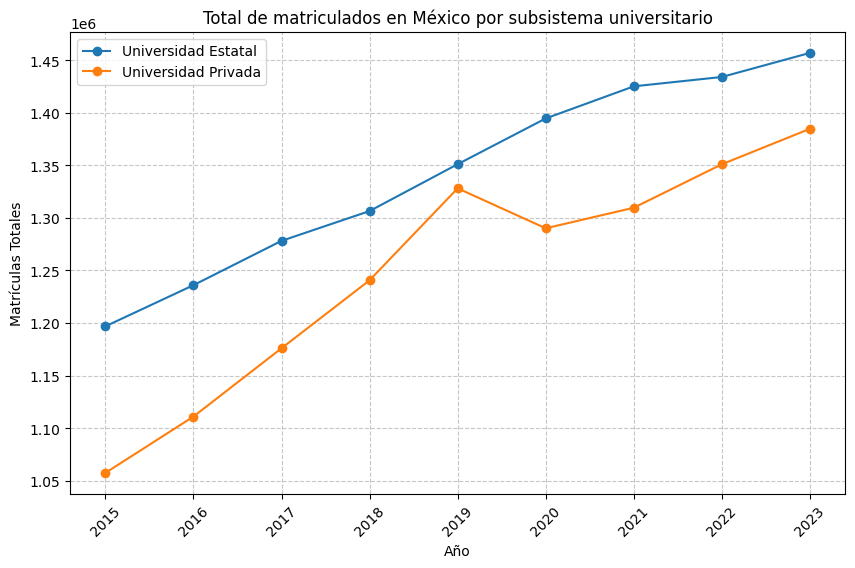

In [14]:
import matplotlib.pyplot as plt

# Crear gráfico de líneas con puntos y cuadrícula
dfs = [dfUniv_estatal, dfUniv_privadas]
subsistemas = ["Universidad Estatal", "Universidad Privada"]

plt.figure(figsize=(10, 6))  # Definir tamaño de la figura

for i in range(len(dfs)):   
	dates = dfs[i]["Año"].unique()
	data = dfs[i][dfs[i]["Entidad Federativa"] == "Estados Unidos Mexicanos"]["Matrícula Total"].tolist()
	
	plt.plot(dates, data, marker='o', linestyle='-', label=subsistemas[i])  # Agregar puntos con 'o'

# Personalizar la gráfica
plt.title("Total de matriculados en México por subsistema universitario")
plt.xlabel("Año")
plt.ylabel("Matrículas Totales")
plt.xticks(rotation=45)
plt.legend()  # Mostrar leyenda con los nombres de cada línea
plt.grid(True, linestyle='--', alpha=0.7)  # Activar cuadrícula con líneas punteadas

plt.show()


